# 2.Random forests for image approximation

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from sklearn.ensemble import RandomForestRegressor as rforest
from sklearn.neighbors import KNeighborsRegressor as knn

(a)Start with an image of the Mona Lisa. If you don’t like the Mona Lisa, pick another interesting
image of your choice.

Figure 2: Left: http://tinyurl.com/mona-lisa-small Mona Lisa, Leonardo da Vinci, via Wikipedia.
Licensed under Public Domain. Middle: Example output of a decision tree regressor. The input is a
“feature vector” containing the (x, y) coordinates of the pixel. The output at each point is an (r, g ,b)
tuple. This tree has a depth of 7. Right: Example output of a k-NN regressor, where k = 1. The output at
each pixel is equal to its closest sample from the training set.

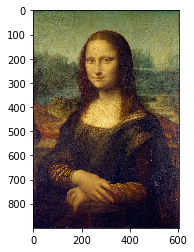

In [15]:
im = Image.open("Mona_Lisa.jpg")
img = np.asarray(im)
w, h = im.size
#print(w, h)
#print(img.shape)
plt.imshow(im)
plt.show()

(b) Preprocessing the input. To build your “training set,” uniformly sample 5,000 random (x, y)
coordinate locations.

What other preprocessing steps are necessary for random forests inputs? Describe them,
implement them, and justify your decisions. In particular, do you need to perform mean
subtraction, standardization, or unit-normalization?

In [16]:
x = np.random.choice (w, 5000)
y = np.random.choice (h, 5000)

We do not need to perform mean subtraction, standardization, or unit-normalization. No other step is needed.

(c) Preprocessing the output. Sample pixel values at each of the given coordinate locations.
Each pixel contains red, green, and blue intensity values, so decide how you want to handle
this. There are several options available to you:

In [17]:
sample_size = 5000
pix = [np.array(img[y[i], x[i]])/255 for i in range(sample_size)]
pix = np.array(pix)
data = np.array([y,x])
data = data.T
#pix
#data

Make (x, y) into one sample.

(d) To build the final image, for each pixel of the output, feed the pixel coordinate through the
random forest and color the resulting pixel with the output prediction. You can then use
imshow to view the result. (If you are using grayscale, try imshow(Y, cmap=’gray’) to avoid
fake-coloring). You may use any implementation of random forests, but you should understand the implementation and you must cite your sources.

<function matplotlib.pyplot.show(*args, **kw)>

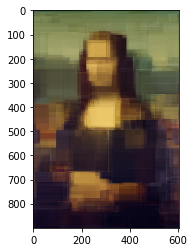

In [30]:
#from sklearn.ensemble import RandomForestRegressor as rforest
test =  [[i, j] for i in range(h) for j in range(w)]

regression = rforest(max_depth = 10 , n_estimators = 10, random_state = 0)
regression.fit(data, pix)
result = regression.predict(test)
result = result.reshape(h, w, 3)
plt.imshow(result)
plt.show

(e) Experimentation.

i. Repeat the experiment for a random forest containing a single decision tree, but with
depths 1, 2, 3, 5, 10, and 15. How does depth impact the result? Describe in detail why.

In [21]:
depth = [1, 2, 3, 5, 10, 15]

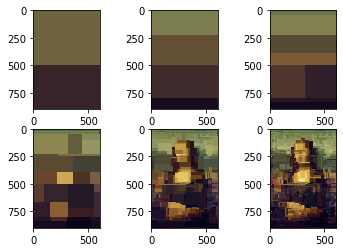

In [22]:
#from sklearn.ensemble import RandomForestRegressor as rforest
for idx,i in enumerate(depth):
    
    regression = rforest(max_depth = i, n_estimators = 1, random_state = 0)
    regression.fit(data, pix)
    result = regression.predict(test)
    result = result.reshape(h, w, 3)
    
    plt.subplot(2, 3, idx + 1)
    plt.plot([0, 1], [0, idx + 1])
    plt.imshow(result)

When we increase the depth, the image become much clearer. Since the depth directly influence the average pixel size, the image gets better when the depth is increasing.

ii. Repeat the experiment for a random forest of depth 7, but with number of trees equal to
1, 3, 5, 10, and 100. How does the number of trees impact the result? Describe in detail
why.

In [24]:
tree = [1, 3, 5, 10, 100]

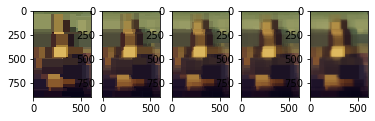

In [31]:
for idx,i in enumerate(tree):
    
    regression = rforest(max_depth = 7, n_estimators = i, random_state = 0)
    regression.fit(data, pix)
    result = regression.predict(test)
    result = result.reshape(h, w, 3)
    
    plt.subplot(1, 5, idx + 1)
    plt.plot([0, 1], [0, idx + 1])
    plt.imshow(result)

The pixel size is similar but the color contrast is getting more blended and smooth.This is because that the pixel colors are now chosen as a majority vote among the leaves so that increasing the number of trees will increase the color accuracy.

iii. As a simple baseline, repeat the experiment using a k-NN regressor, for k = 1. This means
that every pixel in the output will equal the nearest pixel from the “training set.” Compare
and contrast the outlook: why does this look the way it does?

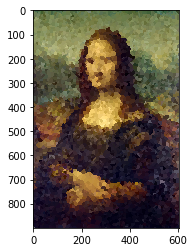

In [113]:
neighbors = knn (n_neighbors = 1)
neighbors.fit(data, pix)
test = [[i, j] for i in range (h) for j in range (w)]
out = neighbors.predict(test)
out = out.reshape(h, w, 3)
plt.imshow(out)

The result better resembles the original Mona Lisa image. Since we use the image without random sample, knn will help us make better approximation which better supports the way that the human eye processes images.

iv. Experiment with different pruning strategies of your choice.

In [124]:
max_leaves = [5,10,20,40,100,150]

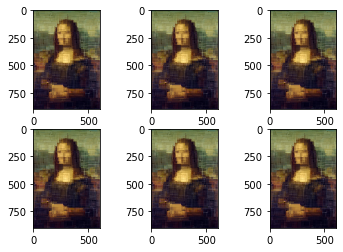

In [125]:
for index,i in enumerate(max_leaves):
    plt.subplot(2,3,index+1)
    plt.plot([0,1],[0,index+1])
    
    max_leaves = rforest(max_depth = i, n_estimators = 10, random_state=0)
    max_leaves.fit(data, pix)
    out = max_leaf.predict(test)
    out = out.reshape(h, w, 3)
    plt.imshow(out)

(f) Analysis.

i. What is the decision rule at each split point? Write down the 1-line formula for the split
point at the root node for one the trained decision trees inside the forest. Feel free to
define any variables you need

The decision rule at each split point is to split into 2 nodes based on the coordinates of (x, y). Assuming that y = 1000 is split point and for pixels(
x,y), if y > 1000, pixel color = light green, if y <= 1000, pixel color = dark green.

ii. Why does the resulting image look like the way it does? What shape are the patches of
color, and how are they arranged?

The image looks the way it does because the decision tree splits pixel from (x, y) into groups by discrete thresholds. The image consists of a lot of rectangular since the patches of color are rectangular. They are arranged around the 5000 random sample.

iii. Straightforward: How many patches of color may be in the resulting image if the forest
contains a single decision tree? Define any variables you need.

The number of patches of clor will be determined by the depth of the tree. There will be $2^d$ color pixels where d is the depth. The upperbound is the total number of colors of the original training set.

iv. Tricky: How many patches of color might be in the resulting image if the forest contains
n decision trees? Define any variables you need.

The upperbound is the number of different color pixel we have in training set. There will be $n*2^d$ color pixels represented where n is the number of trees and d is the depth. 